# SDLS and CGLS Demo (Slide 19)

In this example, we'll be implementing steepest descent (SDLS) and conjugate gradient (CGLS) algorithms on a simple least squares problem
to demonstrate some of their differences in terms of convergence paths and speed.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import os
import pathlib
import random

home_dir = "/c/Users/thsiao3/Documents/emory_class/MATH789/hw2"
home_dir = pathlib.Path(home_dir)
os.chdir(home_dir)

import gradientLeastSquares as GLS

In [19]:
import importlib as imp
imp.reload(GLS)

<module 'gradientLeastSquares' from '/c/Users/thsiao3/Documents/emory_class/MATH789/hw2/gradientLeastSquares.py'>

Setting up the problem by creating each of the three test matrices for values of a.

In [20]:
random.seed(1)

def create_inputs(a):
    A = np.array([[1, 1+a], [1, 1+2*a], [1, 1+3*a]])
    w_true = np.array([[1],[1.2]])
    error = np.random.normal(loc=0, scale=0.1, size=3)[np.newaxis].T
    c_true = A @ w_true
    c = np.array((A @ w_true) + error) 
    return A, c

a1, a2, a3 = 1, 10e-2, 10e-5
A1, c1 = create_inputs(a1)
A2, c2 = create_inputs(a2)
A3, c3 = create_inputs(a3)

# Initial guess for each scenario
X = np.array([[5,5]]).T

We can run both SDLS and CGLS on the three different scenarios. 

In [21]:
x1sd, his1sd, X_all1sd = GLS.SDLS(A=A1,B=c1, X=X, maxIter=10)
x1cg, his1cg, X_all1cg = GLS.CGLS(A=A1, B=c1, X=X, maxIter=10)
x2sd, his2sd, X_all2sd = GLS.SDLS(A=A2,B=c2, X=X, maxIter=10)
x2cg, his2cg, X_all2cg = GLS.CGLS(A=A2, B=c2, X=X, maxIter=10)
x3sd, his3sd, X_all3sd = GLS.SDLS(A=A3,B=c3, X=X, maxIter=10)
x3cg, his3cg, X_all3cg = GLS.CGLS(A=A3, B=c3, X=X, maxIter=10)

Xsd = [np.hstack((5,X_all1sd[0][0])), np.hstack((5,X_all2sd[0][0])), np.hstack((5,X_all3sd[0][0]))]
Ysd = [np.hstack((5,X_all1sd[1][0])), np.hstack((5,X_all2sd[1][0])), np.hstack((5,X_all3sd[1][0]))]

Xcg = [np.hstack((5,X_all1cg[0][0])), np.hstack((5,X_all2cg[0][0])), np.hstack((5,X_all3cg[0][0]))]
Ycg = [np.hstack((5,X_all1cg[1][0])), np.hstack((5,X_all2cg[1][0])), np.hstack((5,X_all3cg[1][0]))]

In [22]:
def f(x, A, c):
    x = x[np.newaxis].T
    r = (A @ x) - c
    return np.linalg.norm(r)

In [23]:
num_x1 = 100
num_x2 = 100

x1 = np.linspace(-3, 10, num_x1)
x2 = np.linspace(-5, 10, num_x2)
X1, X2 = np.meshgrid(x1, x2)
x = np.reshape(X1, num_x1*num_x2)
y = np.reshape(X2, num_x1*num_x2)

# Loss values for the three objective functions
Z1 = np.reshape(np.apply_along_axis(func1d=f, axis=0, arr=np.vstack((x,y)), A=A1, c=c1), (num_x1,num_x2))
Z2 = np.reshape(np.apply_along_axis(func1d=f, axis=0, arr=np.vstack((x,y)), A=A2, c=c2), (num_x1,num_x2))
Z3 = np.reshape(np.apply_along_axis(func1d=f, axis=0, arr=np.vstack((x,y)), A=A3, c=c3), (num_x1,num_x2))

Z = [Z1, Z2, Z3]
alpha = [a1, a2, a3]

Let's visualize our gradient descent method with a contour plot. Each axis will represent one dimension in our solution vector. 
Red will mean a lower cost in terms of our objective function. The blue points and line represent our descent, while the orange
point represents the true solution vector (1, 1.2). 

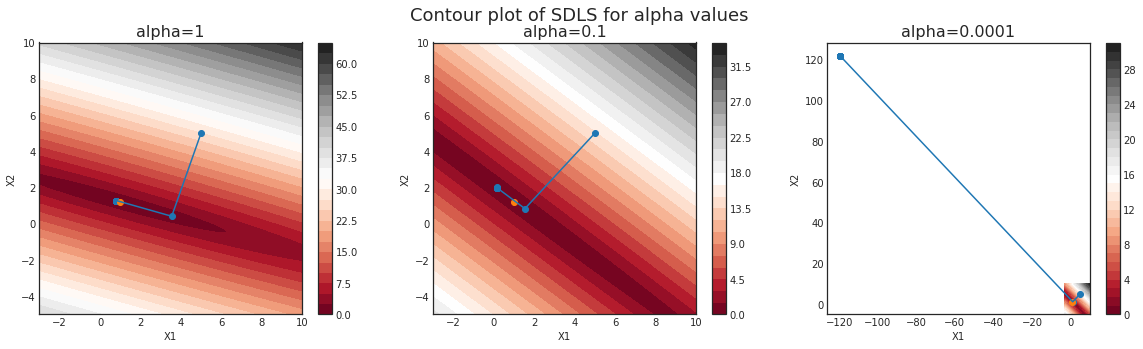

In [24]:
f = plt.figure(figsize=(20, 5))
f.suptitle('Contour plot of SDLS for alpha values', fontsize=18)
for k in range(3):
    ax = f.add_subplot(1, 3, k+1)
    plt.contourf(X1, X2, Z[k], 30,cmap='RdGy');
    plt.colorbar();
    plt.scatter(Xsd[k],Ysd[k])
    plt.plot(Xsd[k],Ysd[k])
    plt.scatter(1, 1.2)
    plt.xlabel("X1")
    plt.ylabel("X2")
    ax.set_title("alpha={}".format(alpha[k]), fontsize=16)

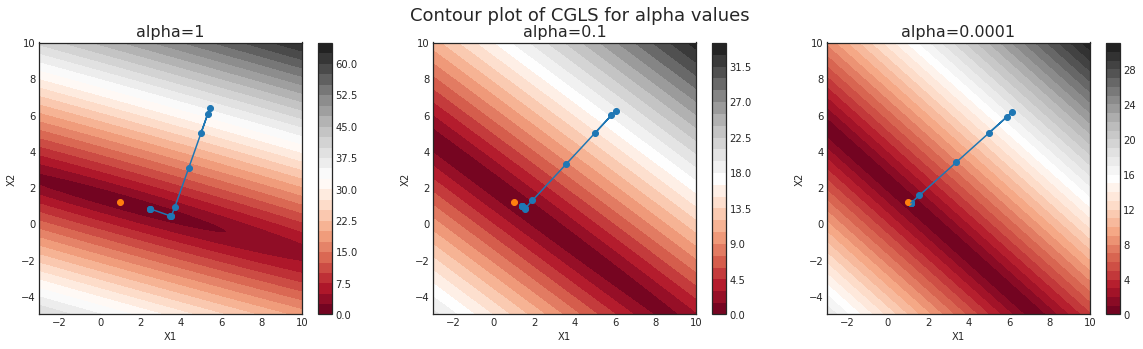

In [25]:
f = plt.figure(figsize=(20, 5))
f.suptitle('Contour plot of CGLS for alpha values', fontsize=18)
for k in range(3):
    ax = f.add_subplot(1, 3, k+1)
    plt.contourf(X1, X2, Z[k], 30,cmap='RdGy');
    plt.colorbar();
    plt.scatter(Xcg[k],Ycg[k])
    plt.plot(Xcg[k],Ycg[k])
    plt.scatter(1, 1.2)
    plt.xlabel("X1")
    plt.ylabel("X2")
    ax.set_title("alpha={}".format(alpha[k]), fontsize=16)

While SDLS gets closer to the true solution in the alpha=1 case, CGLS gets much closer to the true solution in the ill-conditioned case (low alpha). The SDLS for alpha = 0.0001 ends up settling on a solution that is very far from the truth.